In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold

In [2]:
import pickle
filename = 'data/embedding.pkl'
with open(filename, 'rb') as f:
    data = pickle.load(f)

In [3]:
all_X, y = data

In [4]:
n_samples, n_features = all_X[0].shape
print(all_X[0].shape)

(252, 50)


In [5]:
L = len(all_X)
L

6

In [6]:
#----------------------------------------------------------------------
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    plt.figure()
    ax = plt.subplot(111)
    plot_embedding_subplot(ax, X, title)

def plot_embedding_subplot(ax, X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    for i in range(X.shape[0]):
        ax.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    ax.set_xticks([]), ax.set_yticks([])
    if title is not None:
        ax.set_title(title)

In [7]:
from core.DimReduction import DimReduction

In [8]:
dim_reduction = DimReduction(n_components=2)

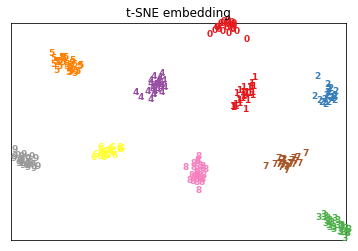

In [9]:
X_tsne = dim_reduction.fit_transform(all_X[-1], 'tsne')
plot_embedding(X_tsne, "t-SNE embedding")

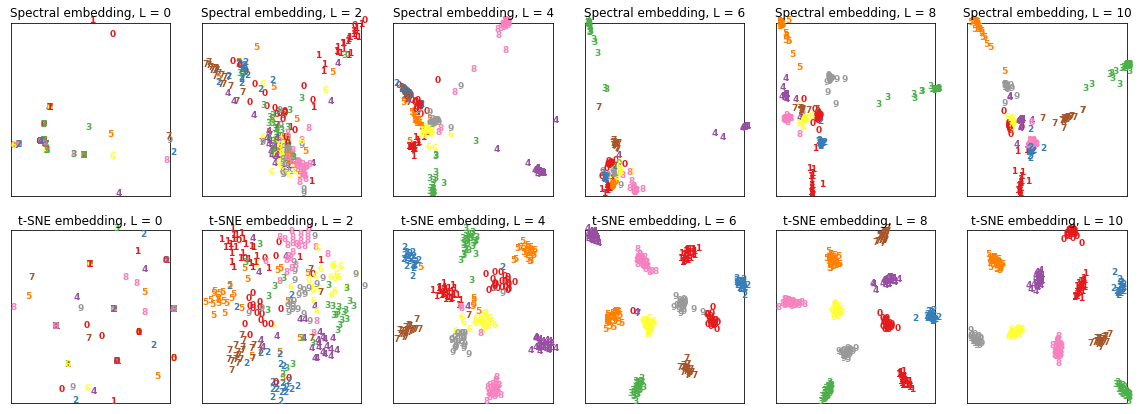

In [20]:
f, axarr = plt.subplots(2, L, sharex='col', sharey='row', figsize=(20, 7))
dim_reduction = DimReduction(n_components=2)
for i in range(L):
    X_se = dim_reduction.fit_transform(all_X[i], 'spectral')
    plot_embedding_subplot(axarr[0,i], X_se, "Spectral embedding, L = " + str(2*i))
    
    X_tsne = dim_reduction.fit_transform(all_X[i], 'tsne')
    plot_embedding_subplot(axarr[1,i], X_tsne, "t-SNE embedding, L = " + str(2*i))

## Affinity matrix

In [21]:
embedder = manifold.SpectralEmbedding(n_components=2, random_state=0,
                                      eigen_solver="arpack")
X_se = embedder.fit_transform(all_X[-1])

In [37]:
W = embedder.affinity_matrix_
W = sp.coo_matrix(W)

In [38]:
all_X[-1].shape

(252, 50)

In [39]:
W.nnz

7024

In [40]:
W.shape[0]

252

In [41]:
import scipy.sparse as sp
nb_edges = W.nnz
nb_vertices = W.shape[0]
edge_to_starting_vertex = sp.coo_matrix((np.ones(nb_edges) ,(np.arange(nb_edges), W.row)),
                                        shape=(nb_edges, nb_vertices))
edge_to_ending_vertex = sp.coo_matrix((np.ones(nb_edges) ,(np.arange(nb_edges), W.col)),
                                      shape=(nb_edges, nb_vertices))


In [42]:
# W_y = embedder._get_affinity_matrix(all_X[-1])